In [ ]:
import pandas as pd

In [ ]:
# Fuente de datos en: https://www.kaggle.com/uciml/german-credit?select=german_credit_data.csv
df = pd.read_csv('/content/sample_data/german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [ ]:
df= df.dropna()
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
7,7,35,male,3,rent,little,moderate,6948,36,car
9,9,28,male,3,own,little,moderate,5234,30,car


Convertir valores categóricos a numéricos
Ver estrategia en https://datasciencechalktalk.wordpress.com/2019/08/01/features-engineering-behind-the-scenes-of-ml-algorithms/

In [ ]:
df=pd.get_dummies(df,prefix=['Sex','Housing','Saving Account','Checking account','Purpose'], drop_first=True)

In [ ]:
df.sample(10)

,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving Account_moderate,Saving Account_quite rich,Saving Account_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
14,28,2,1403,15,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
89,28,2,1108,12,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
530,32,2,2273,36,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0
713,25,1,1138,9,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
154,36,3,6967,24,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0
438,65,0,3394,42,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
975,57,1,1258,24,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
319,27,1,3643,15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
813,54,2,3051,48,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
425,21,2,2779,18,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0


Reducir el numero de características usando Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(2)  
projected = pca.fit_transform(df)
print(df.shape)
print(projected.shape)

(522, 19)
(522, 2)


Aplicamos el algoritmo KMeans y para elegir el número apropiado de centroides usamos el método Elbow

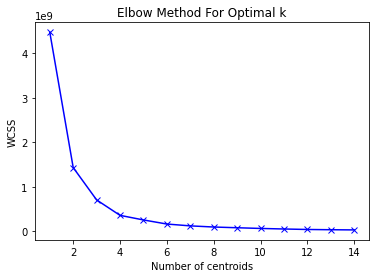

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(projected)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

Como puede ver, el k óptimo está entre 3 y 4. Para simplificar el modelo, establezcamos k = 3. Veamos cómo funcionará nuestro algoritmo.

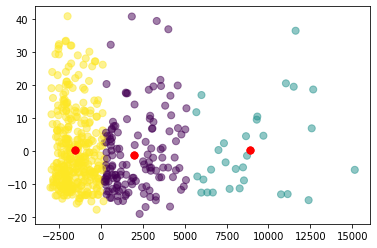

In [ ]:
#converting our projected array to pandas df
pca=pd.DataFrame(projected)
pca.columns=['First component','Second Component']
#build our algorithm with k=3, train it on pca and make predictions
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca)
y_kmeans = kmeans.predict(pca)
#plotting the results 
plt.scatter(pca['First component'], pca['Second Component'], c=y_kmeans, s=50, alpha=0.5,cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50)

El algoritmo agrupó a los clientes en tres categorías, según sus características (que se han almacenado principalmente en los dos primeros componentes principales).
El siguiente paso para el analista podría ser indagar sobre las razones detrás de esta segmentación y cómo esas razones podrían afectar la decisión del banco de otorgar crédito a un cliente de un grupo en particular.
El poder de las técnicas de agrupación en clústeres es que pueden producir resultados relevantes en solo unos segundos, mientras que analizar todos los clientes manualmente habría llevado una gran cantidad de tiempo.



In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1,
       0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,